In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

I read in the data.csv file that was given and I started preparing it for being used for data analysis. This included removing duplicates, renaming the column 'Participant Code' to 'ParticipantCode', and setting the index to 'ParticipantCode'

In [2]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)
df = df.rename(columns={"Participant Code": "ParticipantCode"})
df = df.set_index('ParticipantCode')

The below code replaces all null cell values with 'x' so that the null values do not disrupt the data analysis functions.

In [3]:
df = df.fillna('x')
df

,Term,Test,Instructor,LetterGrade,PercentGrade,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
ParticipantCode,,,,,,,,,,,,,,,,,,,,,
KEY,x,x,x,x,x,E,D,D,E,A,...,B,C,B,D,C,C,D,B,A,D
NaN,x,x,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
22,1,Post,A,D,54.83,D,C,B,C,B,...,C,A,C,A,C,A,B,A,B,A
50,1,Pre,A,F,12.41,A,x,A,x,A,...,x,A,B,A,x,C,x,x,x,x
82,1,Pre,A,B+,84.94,C,C,A,C,E,...,D,x,B,A,D,C,A,E,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2,Post,B,A,97.72,A,D,D,D,C,...,x,x,x,x,x,x,x,B,x,x
42,2,Post,B,B+,87.81,D,x,A,x,D,...,x,E,C,x,B,C,A,x,x,A
42,2,Pre,B,B+,87.81,C,C,x,C,A,...,x,x,x,x,x,x,x,x,x,x


The code below is to compare all test-answer values to the test-answer KEY provided. This function accumulates the number of correct answers for each ParticipantCode and appends each ParticipantCode's correct answers to a list of 'scores'. The 'scores' list is then added as a new column 'CorrectAnswers' at the end of the dataframe.

In [4]:
scores =['x', 'x']
for s in range(2, 149):
    score = 0
    for q in range(6, 32):
        if df.iloc[s , q] == df.iloc[0 , q]:
            score += 1
    scores.append(score)    
df['CorrectAnswers'] = scores
df

,Term,Test,Instructor,LetterGrade,PercentGrade,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,CorrectAnswers
ParticipantCode,,,,,,,,,,,,,,,,,,,,,
KEY,x,x,x,x,x,E,D,D,E,A,...,C,B,D,C,C,D,B,A,D,x
NaN,x,x,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
22,1,Post,A,D,54.83,D,C,B,C,B,...,A,C,A,C,A,B,A,B,A,4
50,1,Pre,A,F,12.41,A,x,A,x,A,...,A,B,A,x,C,x,x,x,x,7
82,1,Pre,A,B+,84.94,C,C,A,C,E,...,x,B,A,D,C,A,E,B,B,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2,Post,B,A,97.72,A,D,D,D,C,...,x,x,x,x,x,x,B,x,x,5
42,2,Post,B,B+,87.81,D,x,A,x,D,...,E,C,x,B,C,A,x,x,A,2
42,2,Pre,B,B+,87.81,C,C,x,C,A,...,x,x,x,x,x,x,x,x,x,2


This function takes the values from the newly created 'CorrectAnswers' column
and divides them by the number of total questions attempted(27). The calculation assumes that
questions not answered (cells with 'x' values) are counted as attempted questions
which are counted as incorrect. The resulting proportion is turned into a percentage
by muliplying by 100. The 'TestScores' are rounded to two decimal places. 'TestScores
then gets added as a column named 'TestGrade'.

In [5]:
TestScores =['x', 'x']
for s in range(2, 149):
    score = df.iloc[s,32]
    score = score/27*100
    
    TestScores.append(round(score, 2))

df['TestGrade'] = TestScores
df

,Term,Test,Instructor,LetterGrade,PercentGrade,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,CorrectAnswers,TestGrade
ParticipantCode,,,,,,,,,,,,,,,,,,,,,
KEY,x,x,x,x,x,E,D,D,E,A,...,B,D,C,C,D,B,A,D,x,x
NaN,x,x,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
22,1,Post,A,D,54.83,D,C,B,C,B,...,C,A,C,A,B,A,B,A,4,14.81
50,1,Pre,A,F,12.41,A,x,A,x,A,...,B,A,x,C,x,x,x,x,7,25.93
82,1,Pre,A,B+,84.94,C,C,A,C,E,...,B,A,D,C,A,E,B,B,7,25.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2,Post,B,A,97.72,A,D,D,D,C,...,x,x,x,x,x,B,x,x,5,18.52
42,2,Post,B,B+,87.81,D,x,A,x,D,...,C,x,B,C,A,x,x,A,2,7.41
42,2,Pre,B,B+,87.81,C,C,x,C,A,...,x,x,x,x,x,x,x,x,2,7.41


In [6]:
df = df.iloc[2:,:]

The code below writes a new .csv file containing the newly prepared DataFrame

In [7]:
df.to_csv(r'C:\Users\robad\Desktop\School-HSU\Spring 2020\CS 232-Python\Data-Analysis Milestone\data2.csv',)

The below functions are supposed to slice the above DataFrame into smaller DataFrames based upon pre-test/post-test, term 1/term 2, and Instructor A/Instructor B. 

The newly created data frames are then put through a Linear Regression analysis to determine a line of best fit for each to determine how much of a determinant the pre-tests and post-tests are for each participants course 'PercentageGrade'.

Scatter plots are created with each data point representing either a pre-test or a post-test grade for a particpant as the x-coordinate and the y-coordinate being that participant's final course 'PercentageGrade'

This analysis is supposed to determine whether the Instructors have a significant effect on the students from the pre-test to the post-test.

Text(0, 0.5, 'Course Percent Grade')

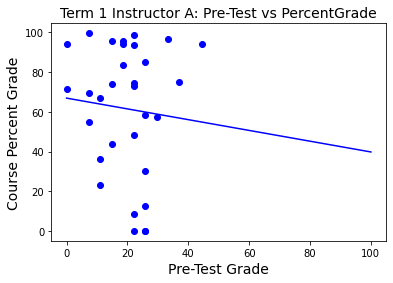

In [8]:
PreTerm1InstA = df[(df['Term'] == 1) & (df['Test'] == 'Pre') & (df['Instructor'] == 'A')]

npMatrix1 = np.matrix(PreTerm1InstA)

X1, Y1 = npMatrix1[:, 33], npMatrix1[:, 4]

X1 = np.asarray(X1).astype(str).astype(float)
Y1 = np.asarray(Y1).astype(str).astype(float)

md1 = LinearRegression().fit(X1,Y1)

m1 = md1.coef_[0]

b1 = md1.intercept_

plt.scatter(X1, Y1, c='blue')

plt.plot([0,100],[b1,m1*100+b1],'b')

plt.title('Term 1 Instructor A: Pre-Test vs PercentGrade', fontsize=14)
plt.xlabel('Pre-Test Grade', fontsize=14)
plt.ylabel('Course Percent Grade', fontsize=14)

Text(0, 0.5, 'Course Percent Grade')

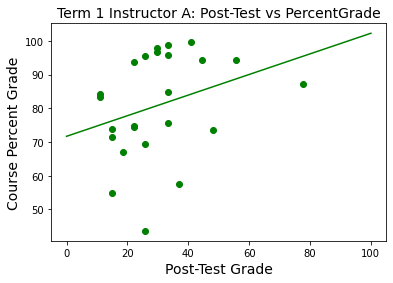

In [9]:
PostTerm1InstA = df[(df['Term'] == 1) & (df['Test'] == 'Post') & (df['Instructor'] == 'A')]

npMatrix2 = np.matrix(PostTerm1InstA)

X2, Y2 = npMatrix2[:, 33], npMatrix2[:, 4]

X2 = np.asarray(X2).astype(str).astype(float)
Y2 = np.asarray(Y2).astype(str).astype(float)

md2 = LinearRegression().fit(X2,Y2)

m2 = md2.coef_[0]

b2 = md2.intercept_

plt.scatter(X2, Y2, c='green')

plt.plot([0,100],[b2,m2*100+b2],'g')

plt.title('Term 1 Instructor A: Post-Test vs PercentGrade', fontsize=14)
plt.xlabel('Post-Test Grade', fontsize=14)
plt.ylabel('Course Percent Grade', fontsize=14)

Text(0, 0.5, 'Course Percent Grade')

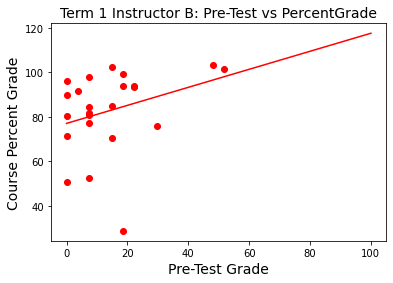

In [10]:
PreTerm1InstB = df[(df['Term'] == 1) & (df['Test'] == 'Pre') & (df['Instructor'] == 'B')]

npMatrix3 = np.matrix(PreTerm1InstB)

X3, Y3 = npMatrix3[:, 33], npMatrix3[:, 4]

X3 = np.asarray(X3).astype(str).astype(float)
Y3 = np.asarray(Y3).astype(str).astype(float)

md3 = LinearRegression().fit(X3,Y3)

m3 = md3.coef_[0]

b3 = md3.intercept_

plt.scatter(X3, Y3, color='red')

plt.plot([0,100],[b3,m3*100+b3], 'red')

plt.title('Term 1 Instructor B: Pre-Test vs PercentGrade', fontsize=14)
plt.xlabel('Pre-Test Grade', fontsize=14)
plt.ylabel('Course Percent Grade', fontsize=14)

Text(0, 0.5, 'Course Percent Grade')

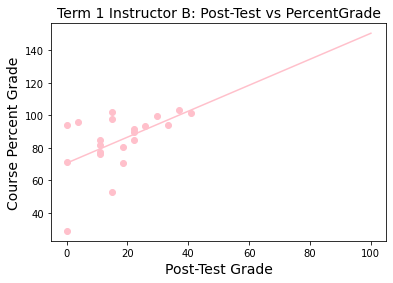

In [11]:
PostTerm1InstB = df[(df['Term'] == 1) & (df['Test'] == 'Post') & (df['Instructor'] == 'B')]

npMatrix4 = np.matrix(PostTerm1InstB)

X4, Y4 = npMatrix4[:, 33], npMatrix4[:, 4]


X4 = np.asarray(X4).astype(str).astype(float)
Y4 = np.asarray(Y4).astype(str).astype(float)

md4 = LinearRegression().fit(X4,Y4)

m4 = md4.coef_[0]

b4 = md4.intercept_


plt.scatter(X4, Y4, c='pink')


plt.plot([0,100],[b4,m4*100+b4], 'pink')


plt.title('Term 1 Instructor B: Post-Test vs PercentGrade', fontsize=14)
plt.xlabel('Post-Test Grade', fontsize=14)
plt.ylabel('Course Percent Grade', fontsize=14)

Text(0, 0.5, 'Course Percent Grade')

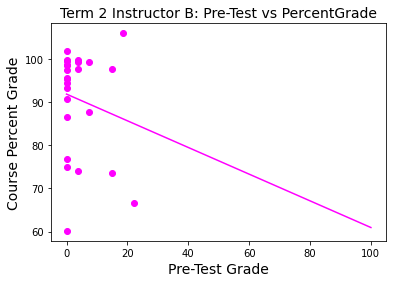

In [12]:
PreTerm2InstB = df[(df['Term'] == 2) & (df['Test'] == 'Pre') & (df['Instructor'] == 'B')]

npMatrix5 = np.matrix(PreTerm2InstB)

X5, Y5 = npMatrix5[:, 33], npMatrix5[:, 4]

X5 = np.asarray(X5).astype(str).astype(float)
Y5 = np.asarray(Y5).astype(str).astype(float)

md5 = LinearRegression().fit(X5,Y5)

m5 = md5.coef_[0]

b5 = md5.intercept_

plt.scatter(X5, Y5, c='magenta')

plt.plot([0,100],[b5,m5*100+b5], 'magenta')

plt.title('Term 2 Instructor B: Pre-Test vs PercentGrade', fontsize=14)
plt.xlabel('Pre-Test Grade', fontsize=14)
plt.ylabel('Course Percent Grade', fontsize=14)

Text(0, 0.5, 'Course Percent Grade')

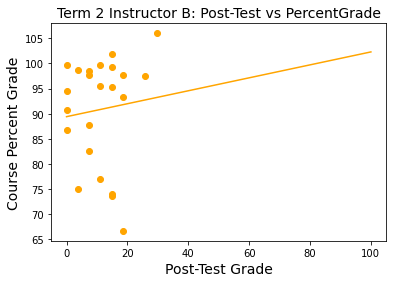

In [13]:
PostTerm2InstB = df[(df['Term'] == 2) & (df['Test'] == 'Post') & (df['Instructor'] == 'B')]

npMatrix6 = np.matrix(PostTerm2InstB)

X6, Y6 = npMatrix6[:, 33], npMatrix6[:, 4]

X6 = np.asarray(X6).astype(str).astype(float)
Y6 = np.asarray(Y6).astype(str).astype(float)

md6 = LinearRegression().fit(X6,Y6)

m6 = md6.coef_[0]

b6 = md6.intercept_

plt.scatter(X6, Y6, c='orange')

plt.plot([0,100],[b6,m6*100+b6], 'orange')

plt.title('Term 2 Instructor B: Post-Test vs PercentGrade', fontsize=14)
plt.xlabel('Post-Test Grade', fontsize=14)
plt.ylabel('Course Percent Grade', fontsize=14)

It appears as if the pre-test is a poor determinant of the participants' final course grades while the post-test is slightly better determinant of the participants final course grades. I wanted to get summary statistics, but I could not figure out how to output them programatically. I had difficulty making these linear regressions and I wish I was able to make individual participant pre/post test comparisons, but I spent too many hours racking my brain to get this far.

# The boxplots below represent each class's test grade distribution for a given Term and Instructor:

Instructor A, Term 1

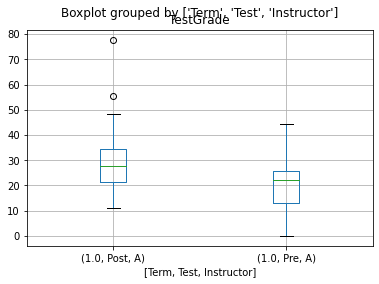

In [14]:
InstA = df[(df['Instructor'] == 'A') & df['Term'] == 1]

InstA.boxplot(column='TestGrade', by=['Term', 'Test','Instructor'])

Instructor B, Term 1

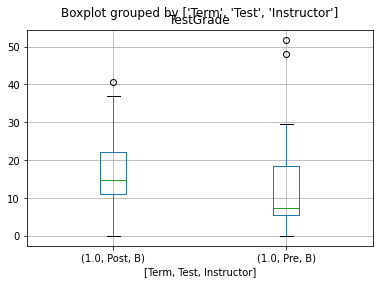

In [15]:
InstB = df[(df['Instructor'] == 'B') & (df['Term'] == 1)]
InstB.boxplot(column='TestGrade', by=['Term', 'Test','Instructor'])

Instructor B, Term 2

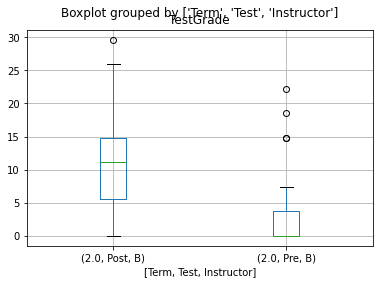

In [16]:
InstB = df[(df['Instructor'] == 'B') & (df['Term'] == 2)]
InstB.boxplot(column='TestGrade', by=['Term', 'Test','Instructor'])

It appears to me that both classes had about the same amount of improvement. This could be due to outliers skewing the data, but I was unable to figure out how to remove outliers.